<h1> E-Commerce Dataset Clustering / Analysis </h1>

Usage of Data science in the field of finances and businesses have been drastically increasing over the years. Analysis of customer behaviours throughout the years is a crucial factor that drives the revenue up for many buisnesses. Below is a dataset of a UK-based retail store that mainly sell all-occasion gifts to wholesalers throughout the European region. This project thoroughly analyzes the dataset and aims to figure out the best and worst selling items, dates through aggregation of the dataset as well as study customer behaviours through k-means clustering in order for the buisness to match the customer needs by taking the advantage of the information.

In [56]:
library(tidyverse)
library(broom)

set.seed(420)

# read / clean data
retail_df <- read_csv("data/online_retail.csv.gz", show_col_types = FALSE)

# print(head(retail_df))

copy_df <- retail_df

head(copy_df)


InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850,United Kingdom


<h3> Aggregation / Exploratory Data Analysis </h3>

Basic information such as max/min items sold and dimensions of the dataset have been found. Important information such as total revenue, amount sold, monthly income, best selling months, and rate of cancellations have been discovered.

In [67]:
# EDA

print(paste0(dim(copy_df)))
print(paste0("Columns: ", ncol(copy_df)))
print(paste0("Rows: ", nrow(copy_df)))

# min and max quantity
minq <- copy_df |>
    filter(Quantity > 0) |>
    select(Quantity) |>
     rename(min_quantity_sold = Quantity) |>
    map_df(min, na.rm = TRUE)

maxq <- copy_df |>
    select(Quantity) |>
     rename(max_quantity_sold = Quantity) |>
    map_df(max, na.rm = TRUE)

minq
maxq

# avg unit price
avg_price <- copy_df |>
    group_by(Description) |>
    summarize(avg_price = mean(UnitPrice, na.rm = TRUE))
print(avg_price)

# total income for each product
total_income <- copy_df |>
    group_by(Description) |>
    summarize(total_revenue_from_product = sum(UnitPrice, na.rm = TRUE)) |>
    filter(total_revenue_from_product > 0)

total_income

# income for the year
copy_df[c("Date", "Time")] <- str_split_fixed(copy_df$InvoiceDate, " ", 2)
copy_df[c("Month", "Day", "Year")] <- str_split_fixed(copy_df$Date, "/", 3) # create new columns
date_df <- copy_df

monthly_income <- copy_df |>
    select(Month, UnitPrice, Quantity) |>
    mutate(Month = as.numeric(Month)) |>
    group_by(Month) |>
    summarize(income = sum(UnitPrice * Quantity, na.rm = TRUE)) |>
    filter(income > 0)

monthly_income


yearly_prices <- copy_df |>
    select(Country, Description, Year, UnitPrice, Quantity) |>
    group_by(Year) |>
    filter(Quantity > 0 & UnitPrice > 0)

yearly_prices

# most/least sold date
calculate <- function(up, q) {
    if (q < 0 || up < 0) {
        return(0)
    } else {
        return(up * q)
    }
}

calculate_ <- Vectorize(calculate)

ordered_by_sold <- copy_df |>
    select(InvoiceDate, UnitPrice, Quantity) |>
    mutate(
        total_sold_monthly =
            calculate_(UnitPrice, Quantity)
    ) |>
    group_by(InvoiceDate) |>
    arrange(desc(total_sold_monthly))

most_sold_date <- ordered_by_sold |>
    rename(MostSoldDate = InvoiceDate) |>
    select(MostSoldDate) |>
    head(1)

most_sold_date

# most popular product
total_income_ <- total_income |>
    filter(total_revenue_from_product == max(total_revenue_from_product)) |>
    rename(best_seller_total_revenue = total_revenue_from_product) |>
    rename(best_seller = Description)

total_income_

# rate of cancellation
cancelled <- date_df |>
    mutate(status = grepl("C", InvoiceNo)) |>
    filter(status == TRUE)

not_canc <- date_df |>
    mutate(status = grepl("C", InvoiceNo)) |>
    filter(status == TRUE)

rate <- nrow(cancelled) / nrow(date_df) * 100

print(paste0("Rate of cancellation: ", rate))

date_df <- not_canc


[1] "541909" "13"    
[1] "Columns: 13"
[1] "Rows: 541909"


min_quantity_sold
<dbl>
1


max_quantity_sold
<dbl>
80995


# A tibble: 4,212 × 2
   Description                      avg_price
   <chr>                                <dbl>
 1 *Boombox Ipod Classic               17.0  
 2 *USB Office Mirror Ball              8.47 
 3 10 COLOUR SPACEBOY PEN               1.05 
 4 12 COLOURED PARTY BALLOONS           0.703
 5 12 DAISY PEGS IN WOOD BOX            1.91 
 6 12 EGG HOUSE PAINTED WOOD           17.2  
 7 12 HANGING EGGS HAND PAINTED         2.08 
 8 12 IVORY ROSE PEG PLACE SETTINGS     1.71 
 9 12 MESSAGE CARDS WITH ENVELOPES      2.04 
10 12 PENCIL SMALL TUBE WOODLAND        0.786
# ℹ 4,202 more rows


Description,total_revenue_from_product
<chr>,<dbl>
*Boombox Ipod Classic,16.98
*USB Office Mirror Ball,16.94
10 COLOUR SPACEBOY PEN,343.65
12 COLOURED PARTY BALLOONS,119.51
12 DAISY PEGS IN WOOD BOX,160.20
12 EGG HOUSE PAINTED WOOD,1717.00
12 HANGING EGGS HAND PAINTED,20.80
12 IVORY ROSE PEG PLACE SETTINGS,256.62
12 MESSAGE CARDS WITH ENVELOPES,540.37


Month,income
<dbl>,<dbl>
1,560000.3
2,498062.6
3,683267.1
4,493207.1
5,723333.5
6,691123.1
7,681300.1
8,682680.5
9,1019687.6


Country,Description,Year,UnitPrice,Quantity
<chr>,<chr>,<chr>,<dbl>,<dbl>
United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,10,2.55,6
United Kingdom,WHITE METAL LANTERN,10,3.39,6
United Kingdom,CREAM CUPID HEARTS COAT HANGER,10,2.75,8
United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,10,3.39,6
United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,10,3.39,6
United Kingdom,SET 7 BABUSHKA NESTING BOXES,10,7.65,2
United Kingdom,GLASS STAR FROSTED T-LIGHT HOLDER,10,4.25,6
United Kingdom,HAND WARMER UNION JACK,10,1.85,6
United Kingdom,HAND WARMER RED POLKA DOT,10,1.85,6


MostSoldDate
<chr>
12/9/11 9:15


best_seller,best_seller_total_revenue
<chr>,<dbl>
AMAZON FEE,249042.7


[1] "Rate of cancellation: 1.71394090151668"


<h3> Visualization </h3>

The following line graph allows us to analyze the total revenue the buisness generated over the 1 year of operation from 2010 to 2011. 
The second plot, multi-bar plot, aims to visually inform the unit price as well as the quantity sold of each item.

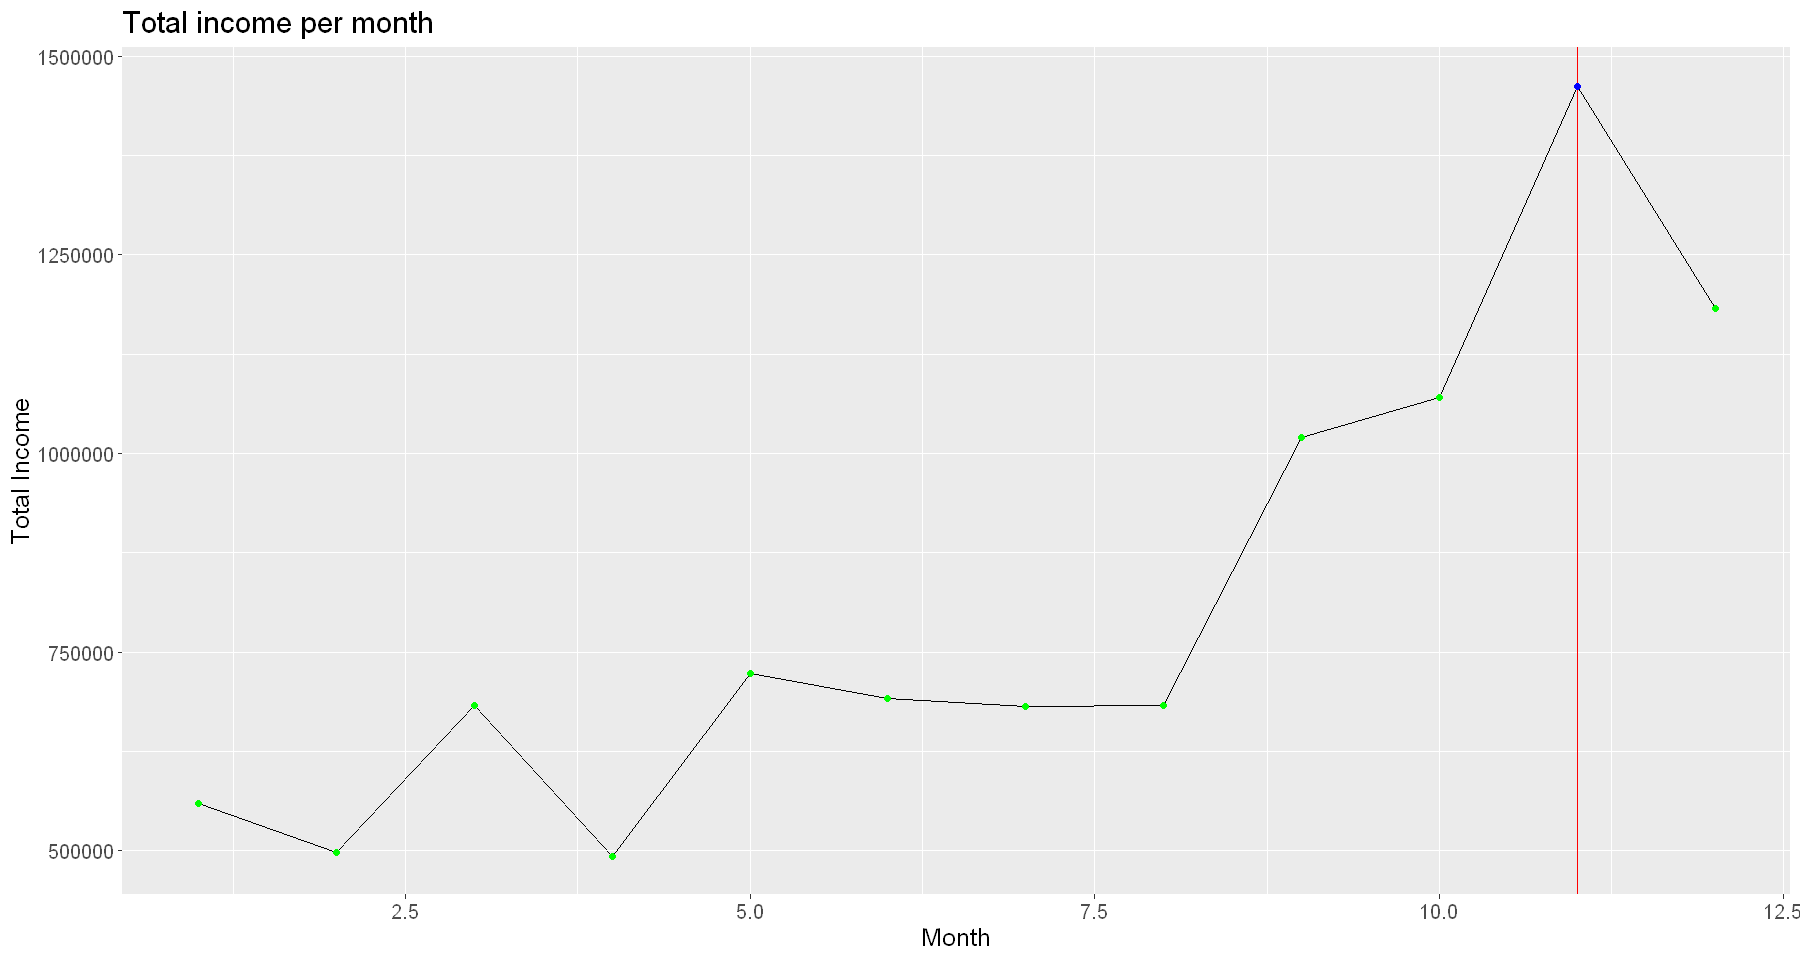

In [58]:
## VISUALIZATIONS

# sales plot (date vs price)
sales_plot_product <- ggplot(monthly_income, aes(x = Month, y = income)) +
    geom_line() +
    geom_point(color = "green") +
    geom_vline(xintercept = 11, color = "red") +
    geom_point(aes(x = 11, y = 1461756.2), colour = "blue") +
    labs(
        x = "Month",
        y = "Total Income"
    ) +
    ggtitle("Total income per month") +
    theme(text = element_text(size = 15))

sales_plot_product


The line plot effectively depicts the income each month. The data was prepared by grouping the data by *Month* and summing all the unit price by quantity. The plot generally shows an increasing slope which represents an increasing income over the months with a peak around November.

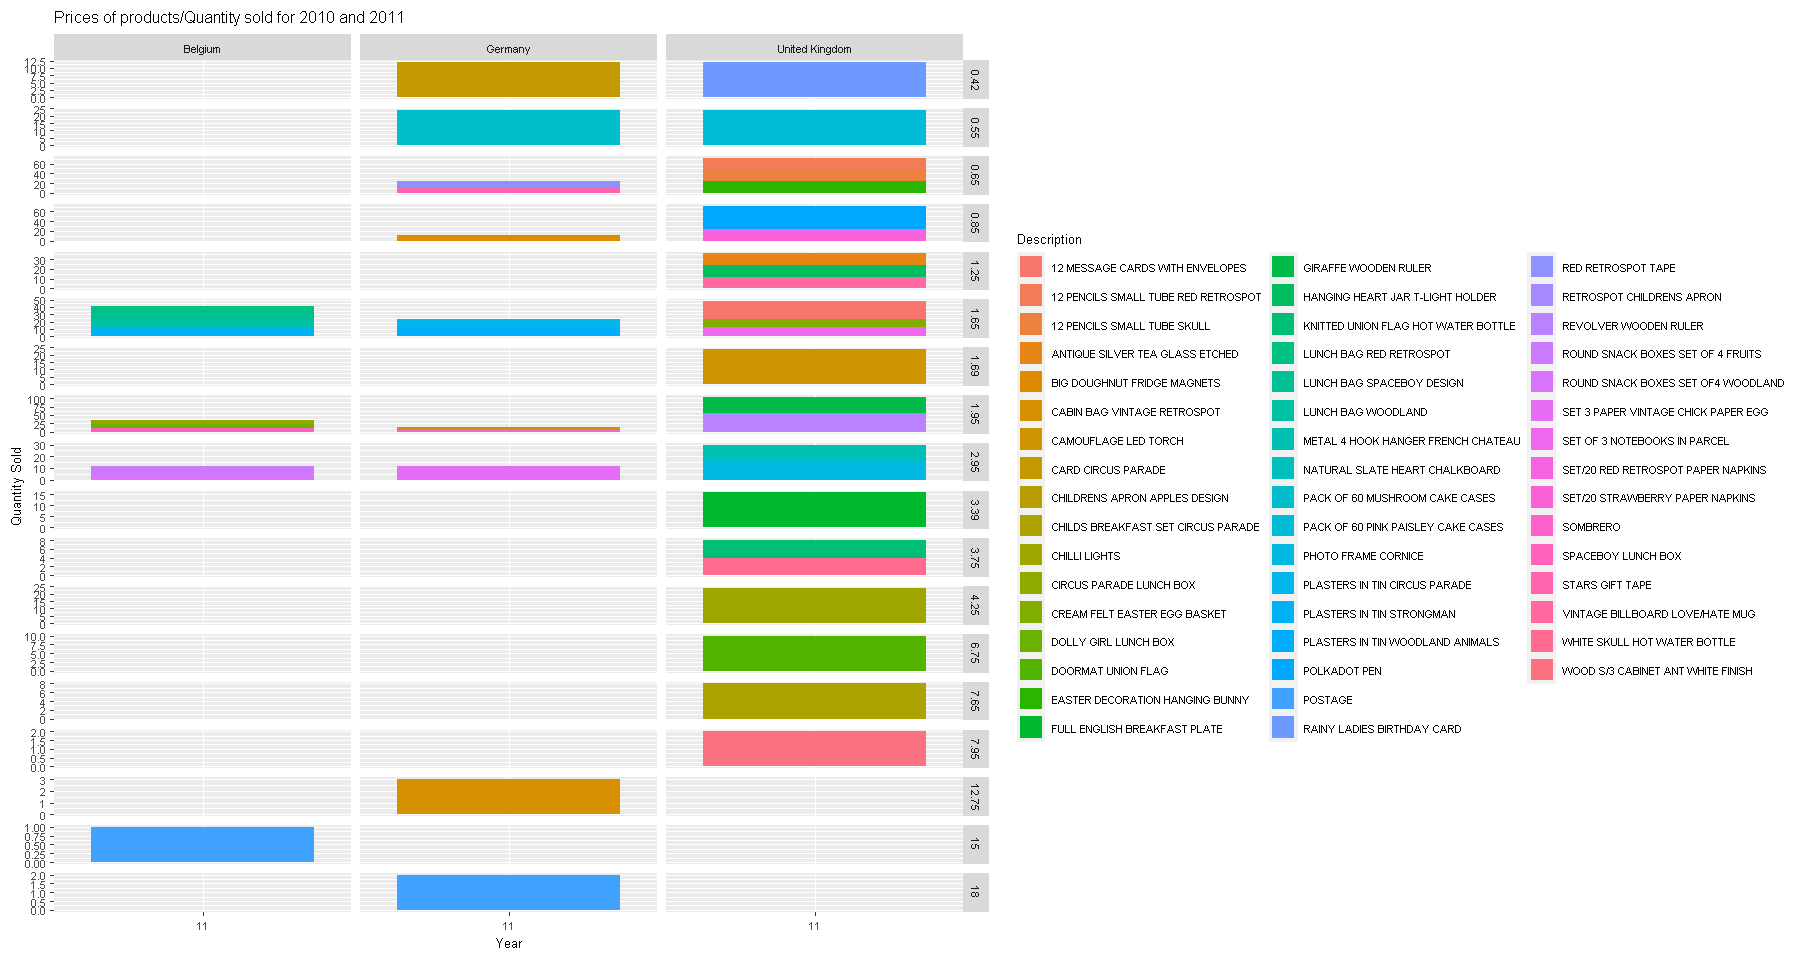

In [59]:
# yearly sales
merged_yearly <- rbind(yearly_prices[100000:100024, ], yearly_prices[72000:72024, ])
sales_plot_country <- ggplot(merged_yearly, aes(x = Year, y = Quantity)) +
    geom_bar(stat = "identity", aes(fill = Description), size = 8) +
    labs(
        x = "Year",
        y = "Quantity Sold"
    ) +
    ggtitle("Prices of products/Quantity sold for 2010 and 2011") +
    theme(text = element_text(size = 8)) +
    facet_grid(UnitPrice ~ Country, scale = "free", space = "free_x")
sales_plot_country


**Note**: Bar graph only takes in subsets of the data as data contains 500,000 rows!

The bar graph is organized in 2 facets: country and unit prices. From the bar graph, the sales are being dominated in the UK but many items are being sold in other European regions like Belgium and Germany. Even though the data used is a random subset, it is clear that majority of sales are made in 2011.

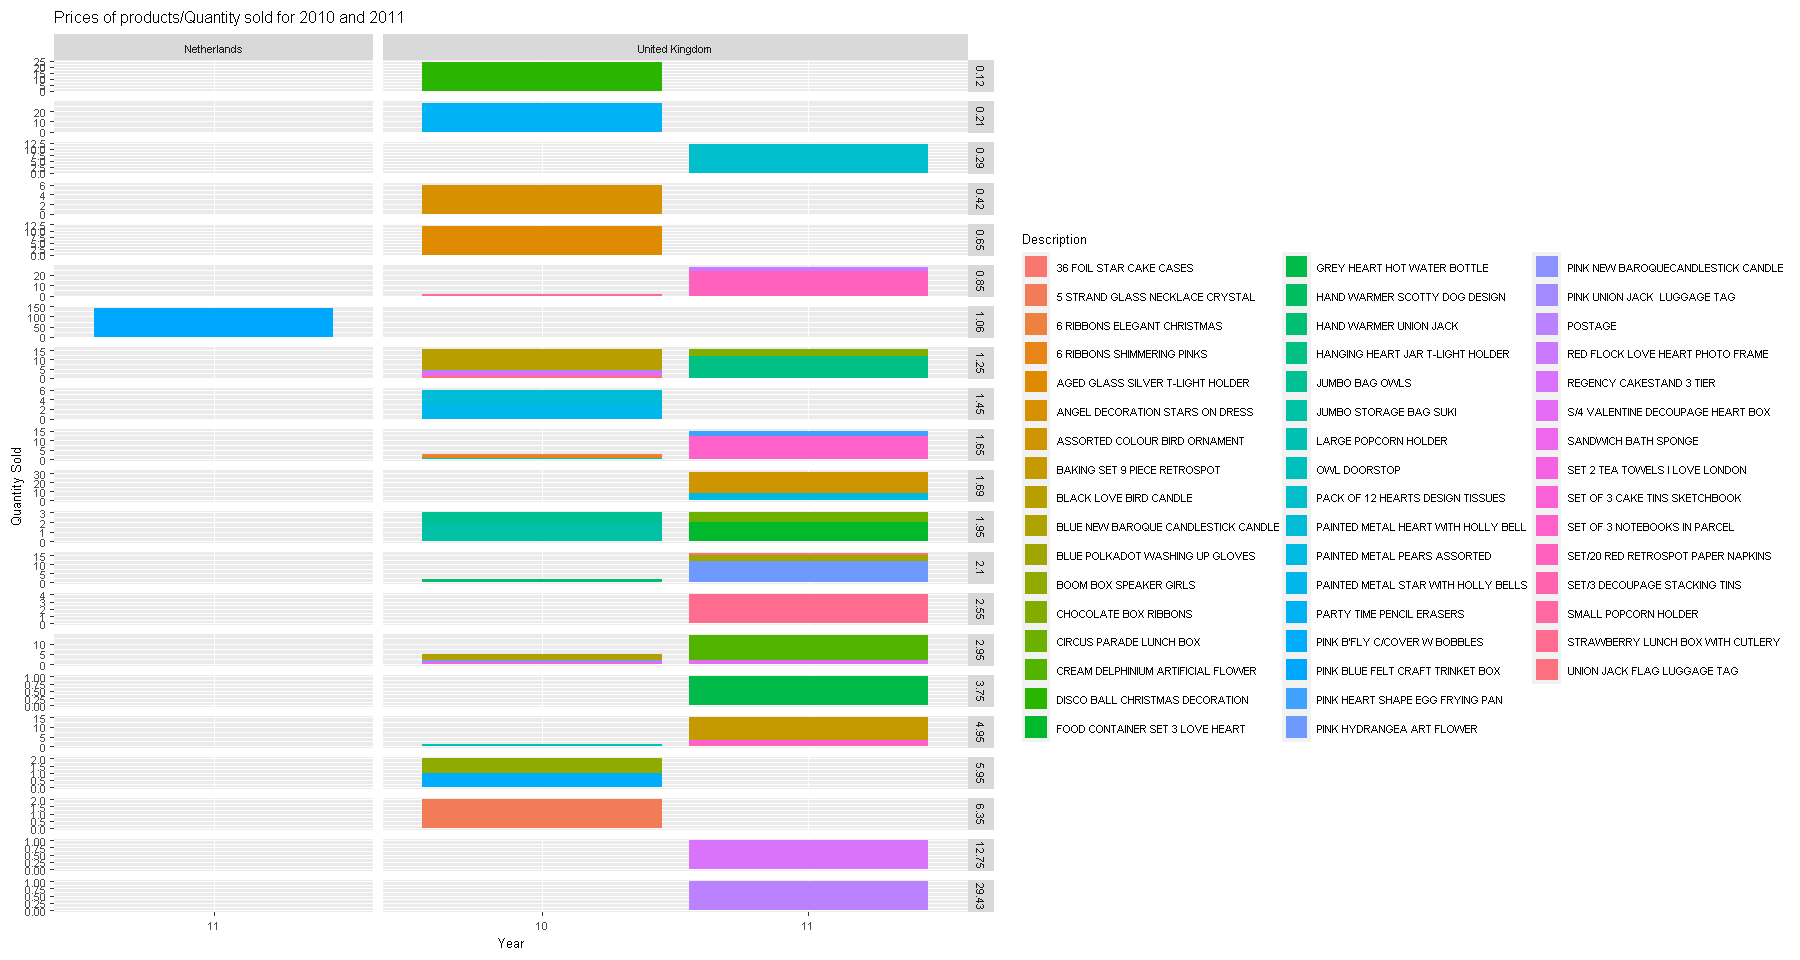

In [60]:
# yearly sales
merged_yearly_ <- rbind(yearly_prices[63000:63024, ], yearly_prices[500:524, ])
sales_plot_country_ <- ggplot(merged_yearly_, aes(x = Year, y = Quantity)) +
    geom_bar(stat = "identity", aes(fill = Description), size = 8) +
    labs(
        x = "Year",
        y = "Quantity Sold"
    ) +
    ggtitle("Prices of products/Quantity sold for 2010 and 2011") +
    theme(text = element_text(size = 8)) +
    facet_grid(UnitPrice ~ Country, scale = "free", space = "free_x")
sales_plot_country_


Again, it is clear that more sales are made in 2011. Netherlands is another country that products are sold to but the UK still domiantes the sales. There are still quite a few UK sales in 2010 but it seems to only take up around 1/4 of the dataset.

<h2> K-means Clustering </h2>

Clustering aims to find the behaviours of every customers in the large dataset where each customers are distinguished by their ID and are clustered by the month they purchase, how much they purchase, as well as how many items they purchase. 

<h4> Process </h4>

Clustering generally works by intializing K and randomly assigning data to the K clusters. The K-means algorithm iteratively updates the center and the label to fit the data into a moderately clean cluster.

1. The first step was to find numerical quantities that would help us create clusters. The month customers purchased, the dollars they purchase for as well as the quantity were values used to cluster. Then, the data was standardized as clustering is calculated through Euclidean distance.

2. The second step was creating a dataframe with a column 'k' that enumerated from 1 to 10. Then, using those k-values, we would operate k-means on each k. N-start argument is crucial in this process as we don't want the k-means algorithm to be "stuck". When centers are intialized, if they are so far away from other points, WSSD can never improve and thus, we set nstart = 10.

3. Then we would use the glance() function to unnest the information. From the information, the elbow plot was created to find the optimal k. Ideally, the k with low WSSD and fast performance would be used which in this case, was 3 with an error of 601918951.

4. Finally we would find k-means of the dataset with k = 3 which gave us the density curve below with 3 different colored clusters based on the parameters (columns).


In [61]:
# The amount of products purchased by each customers and total spent
distinct_sales <- date_df |>
    mutate(Month = as.numeric(Month)) |>
    mutate(Year = as.numeric(Year)) |>
    mutate(Day = as.numeric(Day)) |>
    select(CustomerID, UnitPrice, Quantity, Month, Day, Year) |>
    group_by(CustomerID, Month) |>
    summarize(total_bought = sum(Quantity), total_spent = sum(UnitPrice))

distinct_sales

`summarise()` has grouped output by 'CustomerID'. You can override using the
`.groups` argument.


CustomerID,Month,total_bought,total_spent
<dbl>,<dbl>,<dbl>,<dbl>
12346,1,-74215,1.04
12352,3,-66,856.99
12359,4,-4,17.90
12359,12,-6,69.35
12362,2,-2,4.90
12362,8,-8,8.15
12362,11,-7,21.95
12365,2,-1,320.69
12375,12,-1,2.08


<h4> Step 1 </h4>

CustomerID,Month,total_bought,total_spent
<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
12359,-0.7071068,0.7071068,-0.7071068
12359,0.7071068,-0.7071068,0.7071068
12362,-1.0910895,1.1406469,-0.7474775
12362,0.2182179,-0.7258662,-0.3884673
12362,0.8728716,-0.4147807,1.1359448
12395,-0.6657503,0.5773503,-0.4147807
12395,-0.4841820,-1.1547005,1.1406469
12395,1.1499323,0.5773503,-0.7258662
12408,-0.8320503,-1.1547005,0.7998924


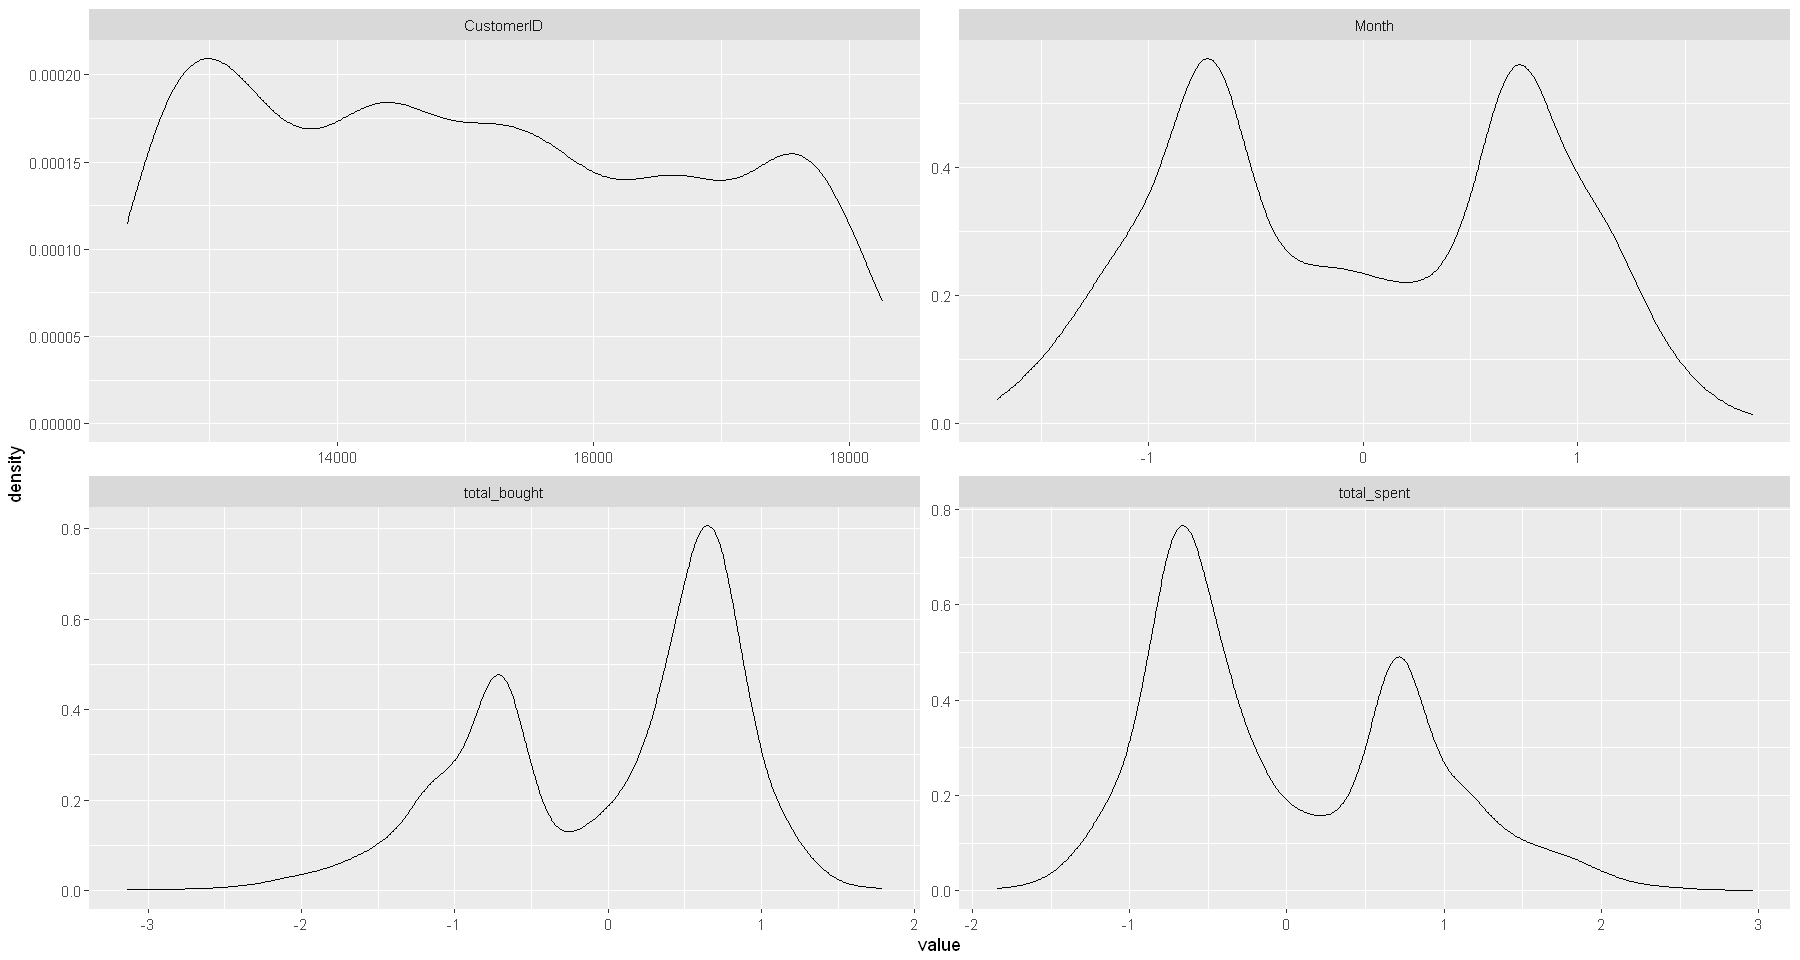

In [62]:
# standardize the distinct sales
new_standardized <- distinct_sales |>
    mutate(across(everything(), scale))

new_standardized <- na.omit(new_standardized)
new_standardized

# plot a density curve to see the overall shape is valid
density <- new_standardized |>
    pivot_longer(cols = c(CustomerID, Month, total_bought, total_spent), names_to = "category", values_to = "value") |>
    ggplot(aes(value)) +
    geom_density(alpha = 0.5) +
    facet_wrap(~category, scales = "free")
density

Above presentations show the standardized data as well as a basic outline of density curve to validate that the dataset is valid (e.g. doesn't show an unpresentable/invalid visualization caused by incorrect or data with no relationship). Data is standardized to ensure that each columns contribute the same amount towards distinguishing each customers (e.g. the numerical months is as responsible as total_spent in distinguishing customers).

<h4> Step 2 & 3 </h4>

k,totss,tot.withinss,betweenss,iter
<int>,<dbl>,<dbl>,<dbl>,<int>
1,5736611661,5736611661,-2.193451e-05,1
2,5736611661,1446711635,4.289900e+09,1
3,5736611661,601918951,5.134693e+09,2
4,5736611661,336743205,5.399868e+09,2
5,5736611661,204749963,5.531862e+09,2
6,5736611661,144592505,5.592019e+09,4
7,5736611661,108608086,5.628004e+09,3
8,5736611661,86528524,5.650083e+09,3
9,5736611661,66470967,5.670141e+09,2


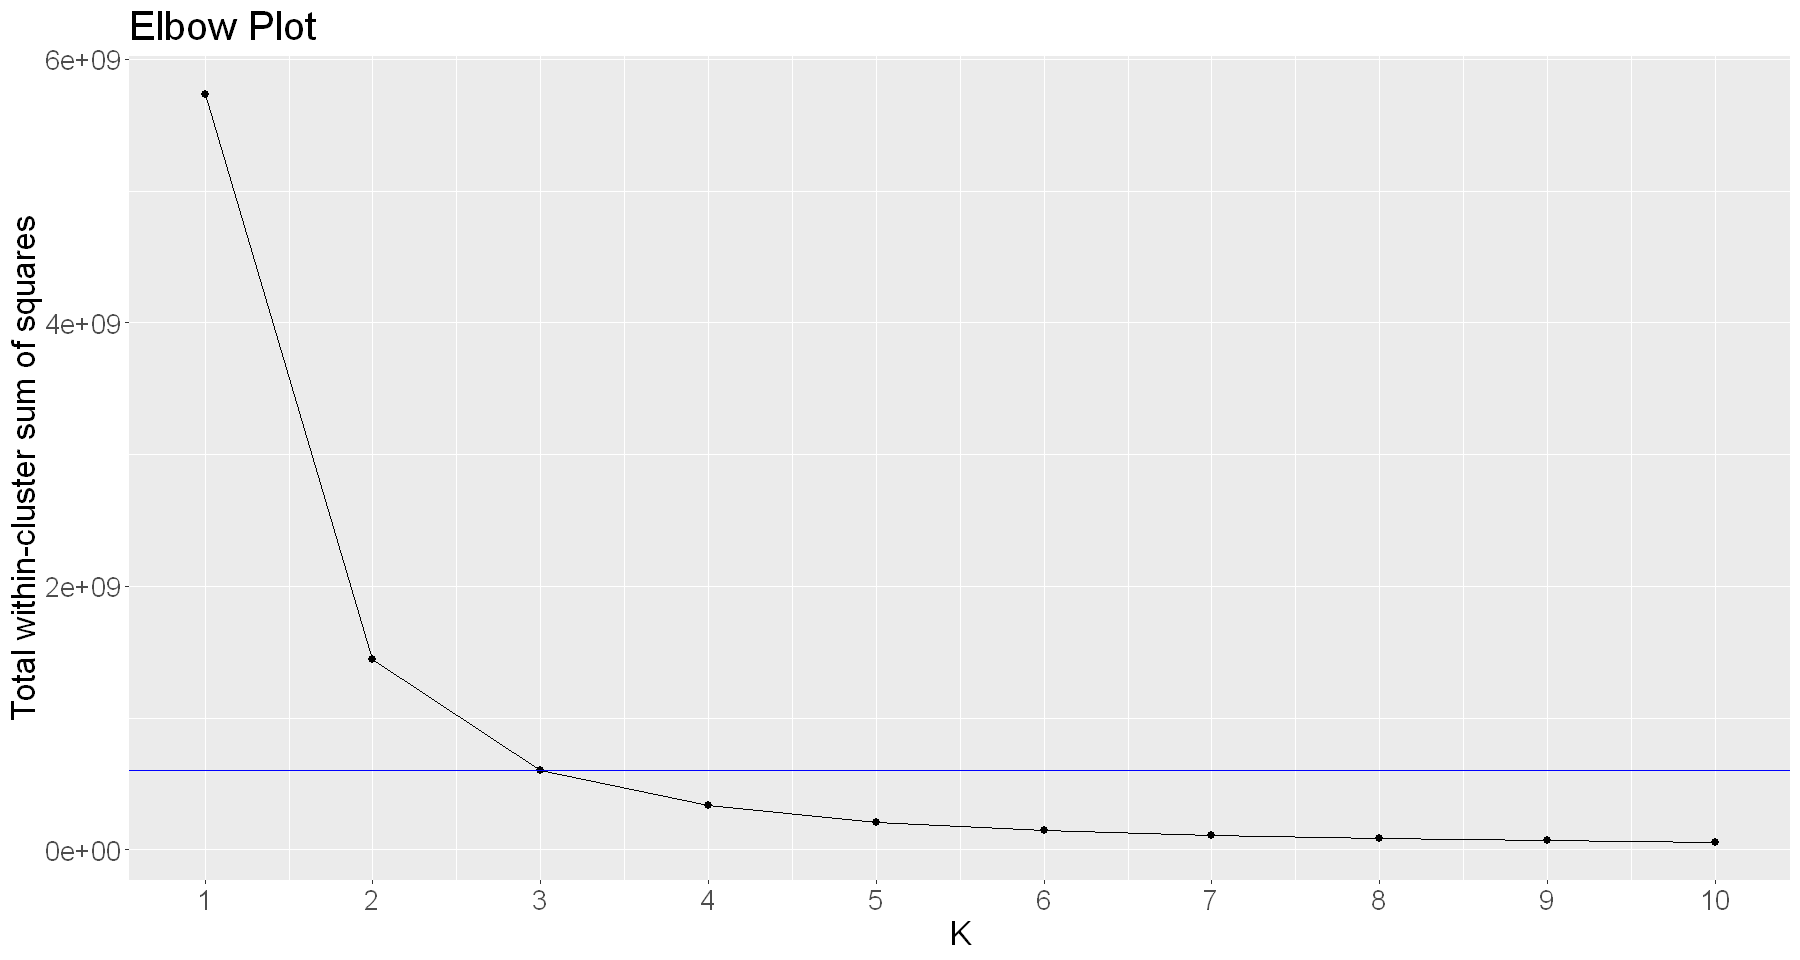

In [63]:
##### 2 #####
# # # create tibble and extract kmeans value for each k
k_tibble <- tibble(k = 1:10) |>
    rowwise() |>
    mutate(
        clusters = list(kmeans(new_standardized, centers = k, nstart = 10)),
        glanced = list(glance(clusters))
    )

##### 3 #####
# gather tot.withinss
clustering_statistics <-
    k_tibble |>
    select(-clusters) |>
    unnest(glanced)

clustering_statistics

# create plot of k vs error
elbow_plot <-
    ggplot(clustering_statistics, aes(x = k, y = tot.withinss)) +
    geom_point(size = 2) +
    geom_line() +
    geom_hline(yintercept = 601918951, color = "blue") +
    labs(
        x = "K",
        y = "Total within-cluster sum of squares",
        title = "Elbow Plot"
    ) +
    scale_x_continuous(breaks = 1:10) +
    theme(text = element_text(size = 20))

elbow_plot


Above is the elbow plot that locates the best K and table with statistics of k-means data such as error and distance between points and center.

<h4> Step 4 (FINAL) </h4>

CustomerID,Month,total_bought,total_spent,.cluster
<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
12359,-0.7071068,0.7071068,-0.7071068,3
12359,0.7071068,-0.7071068,0.7071068,3
12362,-1.0910895,1.1406469,-0.7474775,3
12362,0.2182179,-0.7258662,-0.3884673,3
12362,0.8728716,-0.4147807,1.1359448,3
12395,-0.6657503,0.5773503,-0.4147807,3
12395,-0.4841820,-1.1547005,1.1406469,3
12395,1.1499323,0.5773503,-0.7258662,3
12408,-0.8320503,-1.1547005,0.7998924,3


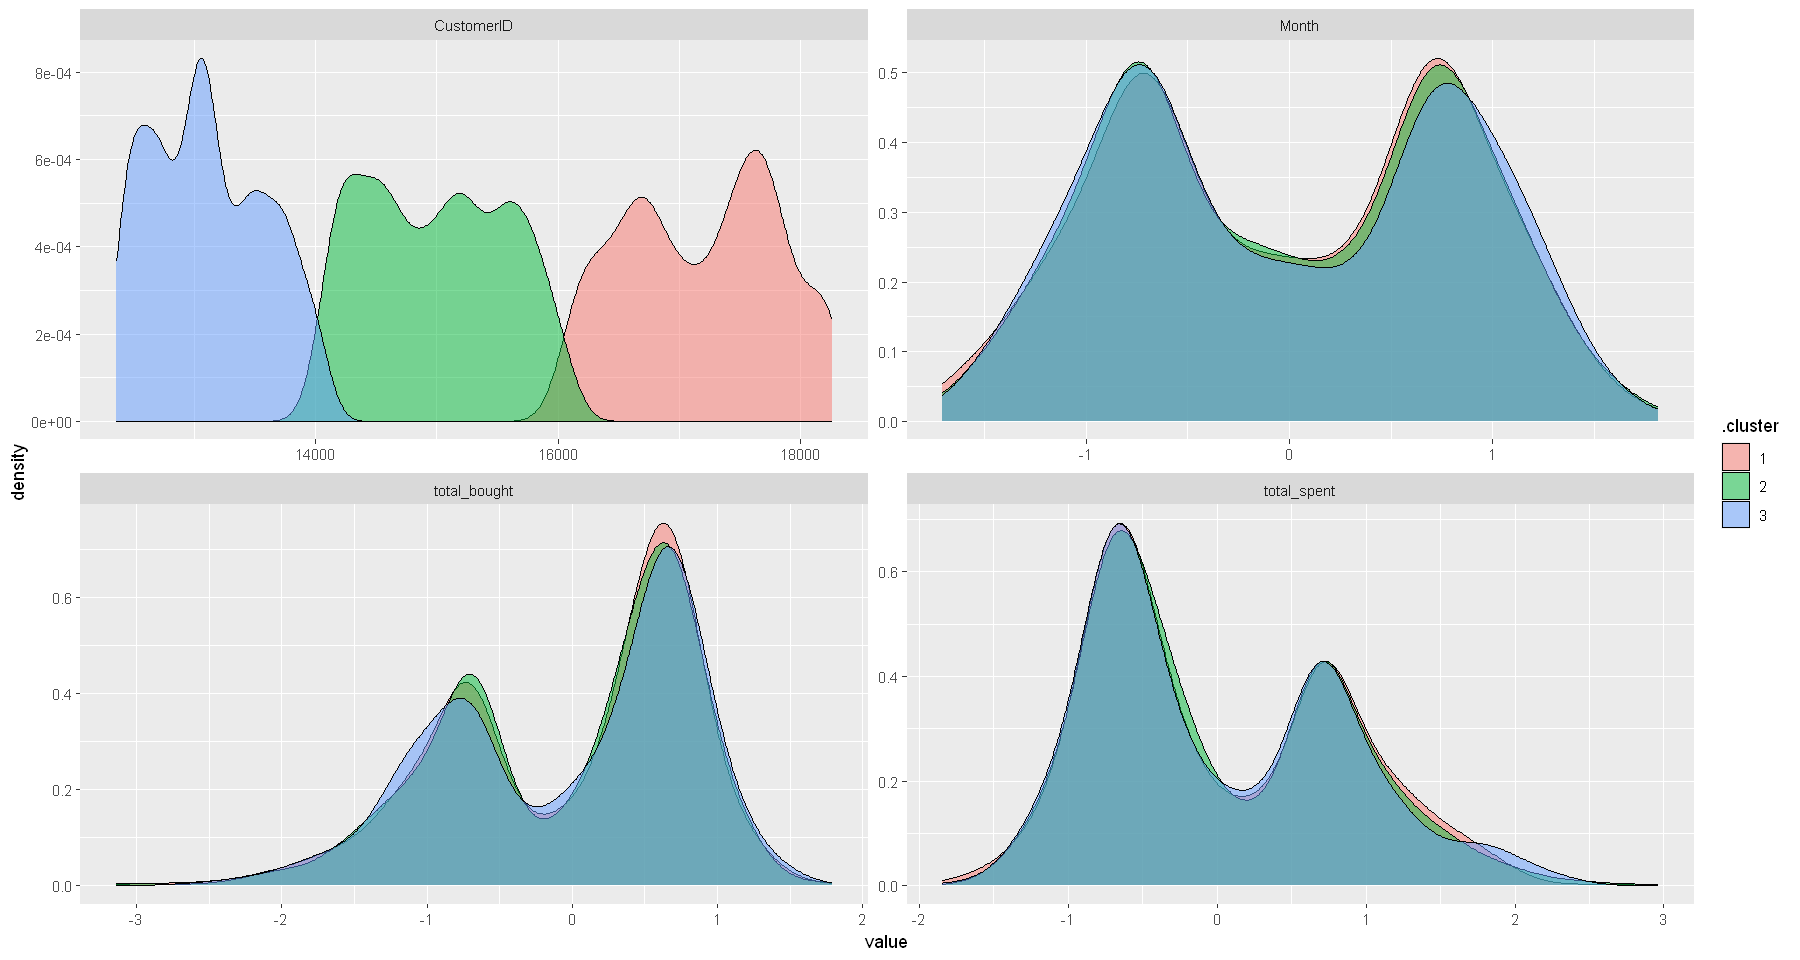

In [64]:
# optimal k
k <- 3

##### 4 #####
# Optimized clustering
optimal_kmeans <- kmeans(new_standardized, centers = k, nstart = 10)

cluster_assignments <- augment(optimal_kmeans, new_standardized)

cluster_assignments

options(repr.plot.height = 8, repr.plot.width = 15)
cluster_density <- cluster_assignments |>
    pivot_longer(cols = -.cluster, names_to = "category", values_to = "value") |>
    ggplot(aes(value, fill = .cluster)) +
    geom_density(alpha = 0.5) +
    facet_wrap(~category, scales = "free")
cluster_density

The above presentations show the augmented version of k-means function with each customers having standardized columns and cluster assignments. The density curve visualizes the customers.

<h1> Conclusion & Analysis </h1>


<h3> Criticism </h3>
In regards to the dataset, majority of the columns were categorical which made it difficult to create clusters. The dataset itself lacks quantitative values that can be used to cluster with low error or perform regression. Personally, I wished that the dataset contained further information such as daily income or the *nth* date of operation, taxes, or simply even more records so that more information can be analyzed and predicted. Since the dataset only contains 1 year of operation, any operation on this dataset could be inaccurate. 

<h3> Benefits </h3>
On the other hand, the dataset did have a few useful columns like *InvoiceNo* and *Country* for me to analyze which customers did or didn't cancel their purchases to calculate rate of cancellation and also which country each customers reside in. The *Unit Price* and the *Quantity* column were also used to gain useful inforamtion like total revenue of each product. 

<h3> Findings & Lessons </h3>
I learned to use the *Date* column and seperate it into *Year, Month* and *day* to calculate things such as monthly/yearly income and visualize it. 
Optimization to find k-value and creating a density curve to distinguish clusters were also learnt throughout this project. Clustering seems to be similar to classification and regression in the sense that the clustering process involves in reducing the WSSD by k-means function reorganizing the centers and other points to reduce the Euclidean distance between centers to create tight clusters which regression and classification similarly utilize. 
Much bigger difference is demonstrated as you cannot gain as much insight as supervised tasks. Nevertheless, we are able to make a conclusion that most customers purchase similarly and there are definite crests and troughs when it comes to periods of high revenue. 

By looking at the density curve of clusters above, the curve seems to be valid and working as the distinct *CustomerID* portion shows little overlaps.
Generally, the months, total quantities purchased and revenue from this retail shop is majorly overlapped by all 3 clusters. The huge overlap in the density curve informs that most customers have the same purchasing pattern with spikes in certain months and the amount they spend, which is depicted by the 2 spikes in each of the three clustering factors. This information could possibly be a positive feedback for the shop as there are conssitent customers (maybe because this shop sells to whole-salers), howeever, because the clusters also overlap in the spikes for areas where *total_spent/total_bought/month* are at its minimum, this could mean that the shop doesn't make much revenue as a whole specifically in certain set-times.
The red and green clusters usually seem to purchase more overall throughout the months while the blue cluster spends more. Altogether, we can conclude that the business is fairly consistent with its earnings and customers. 